# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Maulana Muhammad
- **Email:** maulanamuhammad2000@gmail.com
- **ID Dicoding:** maoelana

## **Menentukan Pertanyaan Bisnis**

1. **Bagaimana pola penyewaan sepeda berdasarkan musim dan bulan?**
   - Analisis distribusi penyewaan sepeda sepanjang tahun dan bulan-bulan tertentu untuk mengidentifikasi pola musiman dan bulanan.

2. **Apa efek dari berbagai kondisi cuaca terhadap jumlah penyewaan sepeda?**
   - Evaluasi dampak dari faktor cuaca seperti hujan, salju, dan suhu terhadap jumlah penyewaan sepeda.

3. **Apakah hari libur dan hari kerja mempengaruhi penyewaan sepeda?**
   - Perbandingan penyewaan sepeda pada hari kerja versus hari libur untuk memahami pengaruh jenis hari terhadap aktivitas penyewaan.

## **Import Semua Packages/Library yang Digunakan**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## **Data Wrangling**

### **Gathering Data**

In [32]:
day_df = pd.read_csv("data\day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Penjelasan Dataset**

Pada proyek ini, saya menggunakan dataset **day dataset** dengan detail sebagai berikut:

- **instant**: Indeks record
- **dteday**: Tanggal
- **season**: Musim
  - 1: Spring
  - 2: Summer
  - 3: Fall
  - 4: Winter
- **yr**: Tahun
  - 0: 2011
  - 1: 2012
- **mnth**: Bulan (1 hingga 12)
- **hr**: Jam (0 hingga 23)
- **holiday**: Apakah hari tersebut adalah hari libur atau tidak.
- **weekday**: Hari dalam minggu
- **workingday**: Apakah hari tersebut adalah workingday (1 jika bukan weekend atau holiday, 0 sebaliknya)
- **weathersit**: Kondisi cuaca
  - 1: Clear
  - 2: Cloudy
  - 3: Rain/Snow
- **temp**: Suhu yang dinormalisasi dalam Celsius. Nilai dihitung dengan (t-t_min)/(t_max-t_min), dengan t_min=-8, t_max=+39 (hanya dalam skala jam)
- **atemp**: Suhu yang dirasakan yang dinormalisasi dalam Celsius. Nilai dihitung dengan (t-t_min)/(t_max-t_min), dengan t_min=-16, t_max=+50 (hanya dalam skala jam)
- **hum**: Kelembapan yang dinormalisasi. Nilai dibagi 100 (maks)
- **windspeed**: Kecepatan angin yang dinormalisasi. Nilai dibagi 67 (maks)
- **casual**: Jumlah pengguna kasual
- **registered**: Jumlah pengguna terdaftar
- **cnt**: Jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar

### **Assessing Data**

#### **Melihat info dataset yang digunakan**

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### **Info Dataset**

Dataset yang digunakan memiliki **731 entri** dengan **16 feature**. Berikut adalah rincian tipe data dan jumlah entri non-null untuk setiap feature:

- **instant**: Indeks record (int64)
- **dteday**: Tanggal (object)
- **season**: Musim (int64)
- **yr**: Tahun (int64)
- **mnth**: Bulan (int64)
- **holiday**: Menunjukkan apakah hari tersebut adalah hari libur (int64)
- **weekday**: Hari dalam minggu (int64)
- **workingday**: Menunjukkan apakah hari tersebut adalah hari kerja (int64)
- **weathersit**: Kondisi cuaca (int64)
- **temp**: Suhu yang dinormalisasi (float64)
- **atemp**: Suhu yang dirasakan (float64)
- **hum**: Kelembapan yang dinormalisasi (float64)
- **windspeed**: Kecepatan angin yang dinormalisasi (float64)
- **casual**: Jumlah pengguna kasual (float64)
- **registered**: Jumlah pengguna terdaftar (int64)
- **cnt**: Jumlah total sepeda yang disewa (int64)

**Tipe Data**

- **int64**: 11 feature
- **float64**: 5 feature
- **object**: 1 feature

#### **Pengecekan Nilai NaN dalam Dataset**

In [34]:
total_nan = day_df.isna().sum().sum()
print("Total NaN: ", total_nan)

Total NaN:  0


Setelah melakukan pengecekan nilai NaN pada dataset menggunakan fungsi **isna()**, ditemukan bahwa tidak terdapat nilai NaN dalam dataset.

#### **Pengecekan nilai duplicate pada dataset**

In [35]:
print("Total duplicates: ", day_df.duplicated().sum())

Total duplicates:  0


Setelah dilakukan pengecekan dengan function **duplicated()** dapat dikatakan bahwa pada dataset day tidak terdapat nilai duplicate.

#### **Melihat statistik dataset yang digunakan**

In [36]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Statistik Deskriptif dan Indikasi Outlier**

Hasil statistik deskriptif menunjukkan bahwa dataset telah diolah dengan baik. Namun, terdapat beberapa indikasi adanya outlier pada beberapa feature, khususnya **windspeed**, **casual**, **registered**, dan **cnt**. Berikut adalah penjelasan lebih lanjut:

- **Windspeed (Kecepatan Angin):**
  - **Mean:** 0.190
  - **Std:** 0.077
  - **Min:** 0.022
  - **Max:** 0.507

  Feature **windspeed** menunjukkan distribusi yang cukup tersebar dengan rentang nilai dari 0.022 hingga 0.507. Nilai maksimum (0.507) terlihat cukup jauh dari nilai rata-rata (0.190), menunjukkan adanya kemungkinan outlier.

- **Casual (Pengguna Sementara):**
  - **Mean:** 848.176
  - **Std:** 686.622
  - **Min:** 2
  - **Max:** 3410

  Pada feature **casual**, nilai maksimum (3410) sangat jauh di atas rata-rata (848.176), dan standar deviasi yang tinggi (686.622) menunjukkan variasi yang besar dalam jumlah pengguna sementara. Hal ini mengindikasikan adanya outlier yang signifikan.

- **Registered (Pengguna Terdaftar):**
  - **Mean:** 3656.172
  - **Std:** 1560.256
  - **Min:** 20
  - **Max:** 6946

  Feature **registered** juga menunjukkan indikasi outlier. Nilai maksimum (6946) jauh lebih tinggi daripada rata-rata (3656.172), dengan standar deviasi yang besar (1560.256), menunjukkan bahwa terdapat beberapa nilai yang sangat tinggi dibandingkan dengan yang lain.

- **Cnt (Total Penyewaan):**
  - **Mean:** 4504.348
  - **Std:** 1937.211
  - **Min:** 22
  - **Max:** 8714

  Pada feature **cnt**, yang merupakan total jumlah penyewaan, nilai maksimum (8714) sangat tinggi dibandingkan dengan rata-rata (4504.348). Standar deviasi yang tinggi (1937.211) juga menunjukkan adanya variasi yang besar dan kemungkinan outlier.

Untuk membuktikan hal tersebut, proses selanjutnya adalah melihat visualisasi pada proses cleaning data.

### **Cleaning Data**

#### **Mengubah dteday yang sebelumnya bertipe object menjadi datetime**

In [37]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#### **Menghapus duplicates**

In [38]:
day_df.drop_duplicates(inplace=True)

#### **Menghapus NaN**

In [39]:
day_df.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### **Cek Outlier**

Untuk memeriksa outlier, diperlukan plot visualisasi boxplot untuk feature **windspeed**, **casual**, **registered**, dan gabungan **casual & registered (cnt)**. Berikut function untuk membuat boxplot


In [40]:
def plot_boxplot(data, column, title, xlabel, ax, color='#619eff'):
    sns.boxplot(x=data[column], ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')

**Windspeed (Kecepatan Angin):** 

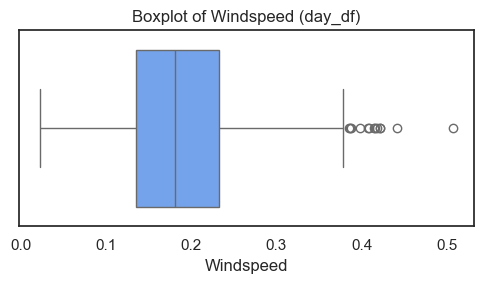

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'windspeed', 'Boxplot of Windspeed (day_df)', 'Windspeed', ax)
plt.tight_layout()
plt.show()

Dari boxplot, terlihat beberapa titik di sisi kanan yang menunjukkan nilai-nilai **windspeed** yang secara signifikan lebih tinggi dari sebagian besar data lainnya, berada di luar rentang \(Q3 + 1.5 * IQR\). Ini membuktikan bahwa pada statistik terdapat outlier pada feature **windspeed**.

**Casual (Pengguna Kasual):**

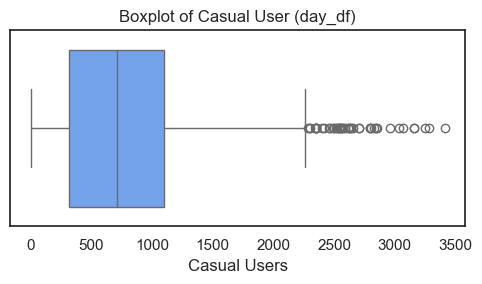

In [42]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'casual', 'Boxplot of Casual User (day_df)', 'Casual Users', ax)
plt.tight_layout()
plt.show()

Pada boxplot feature **casual**, terlihat sejumlah besar outlier yang cukup ekstrem di sisi kanan plot, di luar rentang \(Q3 + 1.5 * IQR\). Ini mengindikasikan adanya beberapa hari di mana jumlah pengguna kasual jauh lebih tinggi dari rata-rata, yang juga membuktikan adanya outlier pada feature **casual**.

**Registered (Pengguna Terdaftar):**

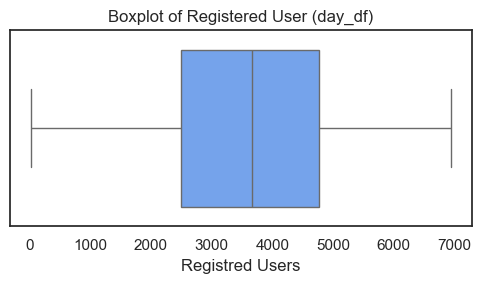

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'registered', 'Boxplot of Registered User (day_df)', 'Registred Users', ax)
plt.tight_layout()
plt.show()

Visualisasi boxplot untuk feature **registered** menunjukkan bahwa tidak ada outlier, karena semua distribusi data masih berada dalam rentang minimum dan maksimum IQR.

 **cnt (Casual & Registered):**

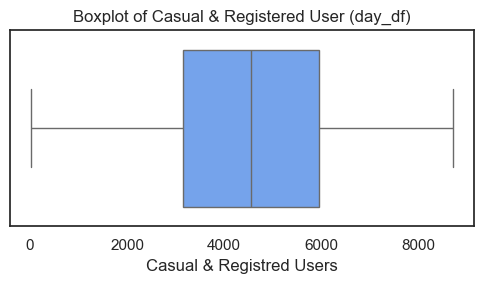

In [44]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'cnt', 'Boxplot of Casual & Registered User (day_df)', 'Casual & Registred Users', ax)
plt.tight_layout()
plt.show()

Begitu juga pada boxplot untuk feature **cnt (casual & registered)**, tidak ditemukan outlier, karena semua distribusi data masih berada dalam rentang minimum dan maksimum IQR.

#### **Teknik Imputation untuk Mengganti Outlier**

Disini untuk menangani outlier dalam dataset menggunakan teknik **imputation** dengan menggantikan nilai outlier dengan **batas minimum atau maksimum dari rentang interkuartil (IQR)**. Berikut adalah function untuk implementasi imputation

In [45]:
def replace_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    lower_than = df[column_name] < minimum
    more_than = df[column_name] > maximum

    df.loc[lower_than, column_name] = minimum
    df.loc[more_than, column_name] = maximum

#### **Menerapkan teknik imputation pada feature windspeed dan casual**

In [46]:
replace_outliers(day_df, 'windspeed')
replace_outliers(day_df, 'casual')

#### **Menghapus nilai mismatch pada feature cnt (casual & registered)**

Penghapusan nilai mismatch diperlukan untuk memastikan konsistensi data, khususnya pada faeture **cnt**, yang merupakan jumlah dari feature **casual** dan **registered**. Pada dasarnya, **cnt** harus sama dengan hasil penjumlahan **casual** dan **registered**. Jika ada ketidaksesuaian antara **cnt** dan penjumlahan **casual** + **registered**, maka data yang tidak sesuai akan dihapus.

In [47]:
day_df['sum_check'] = day_df['casual'] + day_df['registered']
day_df['mismatch'] = day_df['sum_check'] != day_df['cnt']

if day_df['mismatch'].any():
    total_mismatch = day_df['mismatch'].sum()
    print("Total mismatch:", total_mismatch)

    day_df = day_df[~day_df['mismatch']]

day_df = day_df.drop(columns=['sum_check', 'mismatch'])

Total mismatch: 44


Terlihat bahwa terdapat **44** data mismatch, di mana nilai pada feature **cnt** tidak sesuai dengan penjumlahan dari feature **casual** dan **registered**. Karena mismatch dapat menyebabkan bias pada data, langkah selanjutnya adalah menghapus data mismatch tersebut.

## **Exploratory Data Analysis (EDA)**

#### **Cek korelasi antar feature**

Text(0.5, 1.0, 'Correlation Matrix')

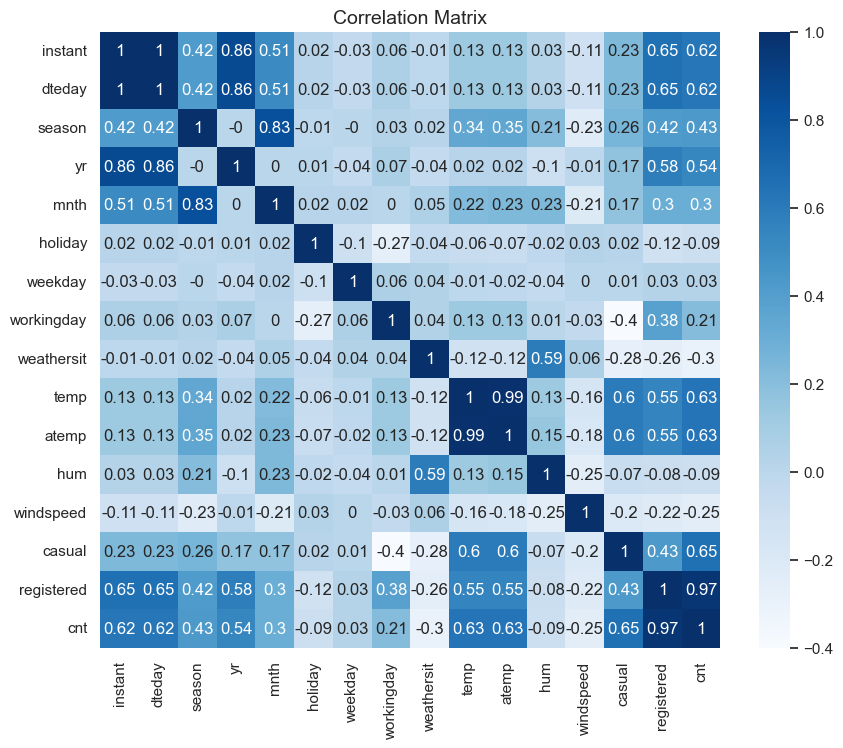

In [48]:
plt.figure(figsize = (10,8))
correlation_matrix = day_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'Blues')
plt.title("Correlation Matrix", size = 14)

Dari visualisasi matriks korelasi, dapat dilihat bahwa:

**Korelasi Positif**

- **cnt** memiliki korelasi positif yang kuat dengan **registered** dan **casual**. Ini menunjukkan bahwa semakin banyak pengguna yang terdaftar (**registered**) dan pengguna kasual (**casual**), maka jumlah total pengguna (**cnt**) juga akan semakin tinggi.
- **temp** dan **atemp** memiliki korelasi positif dengan **cnt**, menunjukkan bahwa saat suhu hangat, lebih banyak orang cenderung menggunakan sepeda.
- **cnt** juga memiliki korelasi positif yang cukup kuat dengan **season**, **yr**, **mnth**, **holiday**, dan **workingday**. Ini menunjukkan bahwa faktor-faktor seperti musim, tahun, bulan, hari libur, dan hari kerja mempengaruhi jumlah pengguna sepeda.

**Korelasi Negatif**

- **cnt** memiliki korelasi negatif dengan **windspeed** dan **weathersit**. Ini menunjukkan bahwa semakin tinggi kecepatan angin dan semakin buruk kondisi cuaca, maka jumlah pengguna sepeda akan semakin sedikit.
- **holiday** dan **workingday** memiliki korelasi negatif. Hal ini masuk akal karena hari libur biasanya bukan hari kerja.

#### **Cek distribusi fitur numerik dan kategorikal**

In [49]:
sns.set_theme(style="white")

def plot_numerical_distribution(data, numerical_columns, grid_size=(3, 3), color="blue"):
    nrows, ncols = grid_size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(data[col], kde=True, ax=axes[i], color=color)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, categorical_columns, grid_size=(3, 3), color="#619eff"):
    nrows, ncols = grid_size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=data[col], ax=axes[i], color=color)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

Untuk proses pengecekan distribusi, terdapat dua jenis data, yaitu numerik dan kategorikal:

**Fitur Numerik**
- **temp**: Suhu yang dinormalisasi
- **atemp**: Suhu yang dirasakan
- **hum**: Kelembapan yang dinormalisasi
- **windspeed**: Kecepatan angin yang dinormalisasi
- **cnt**: Jumlah total sepeda yang disewa

**Fitur Kategorikal**
- **season**: Musim
- **yr**: Tahun
- **mnth**: Bulan
- **holiday**: Menunjukkan apakah hari tersebut adalah hari libur
- **weekday**: Hari dalam mingg
- **workingday**: Menunjukkan apakah hari tersebut adalah hari kerja
- **weathersit**: Kondisi cuaca

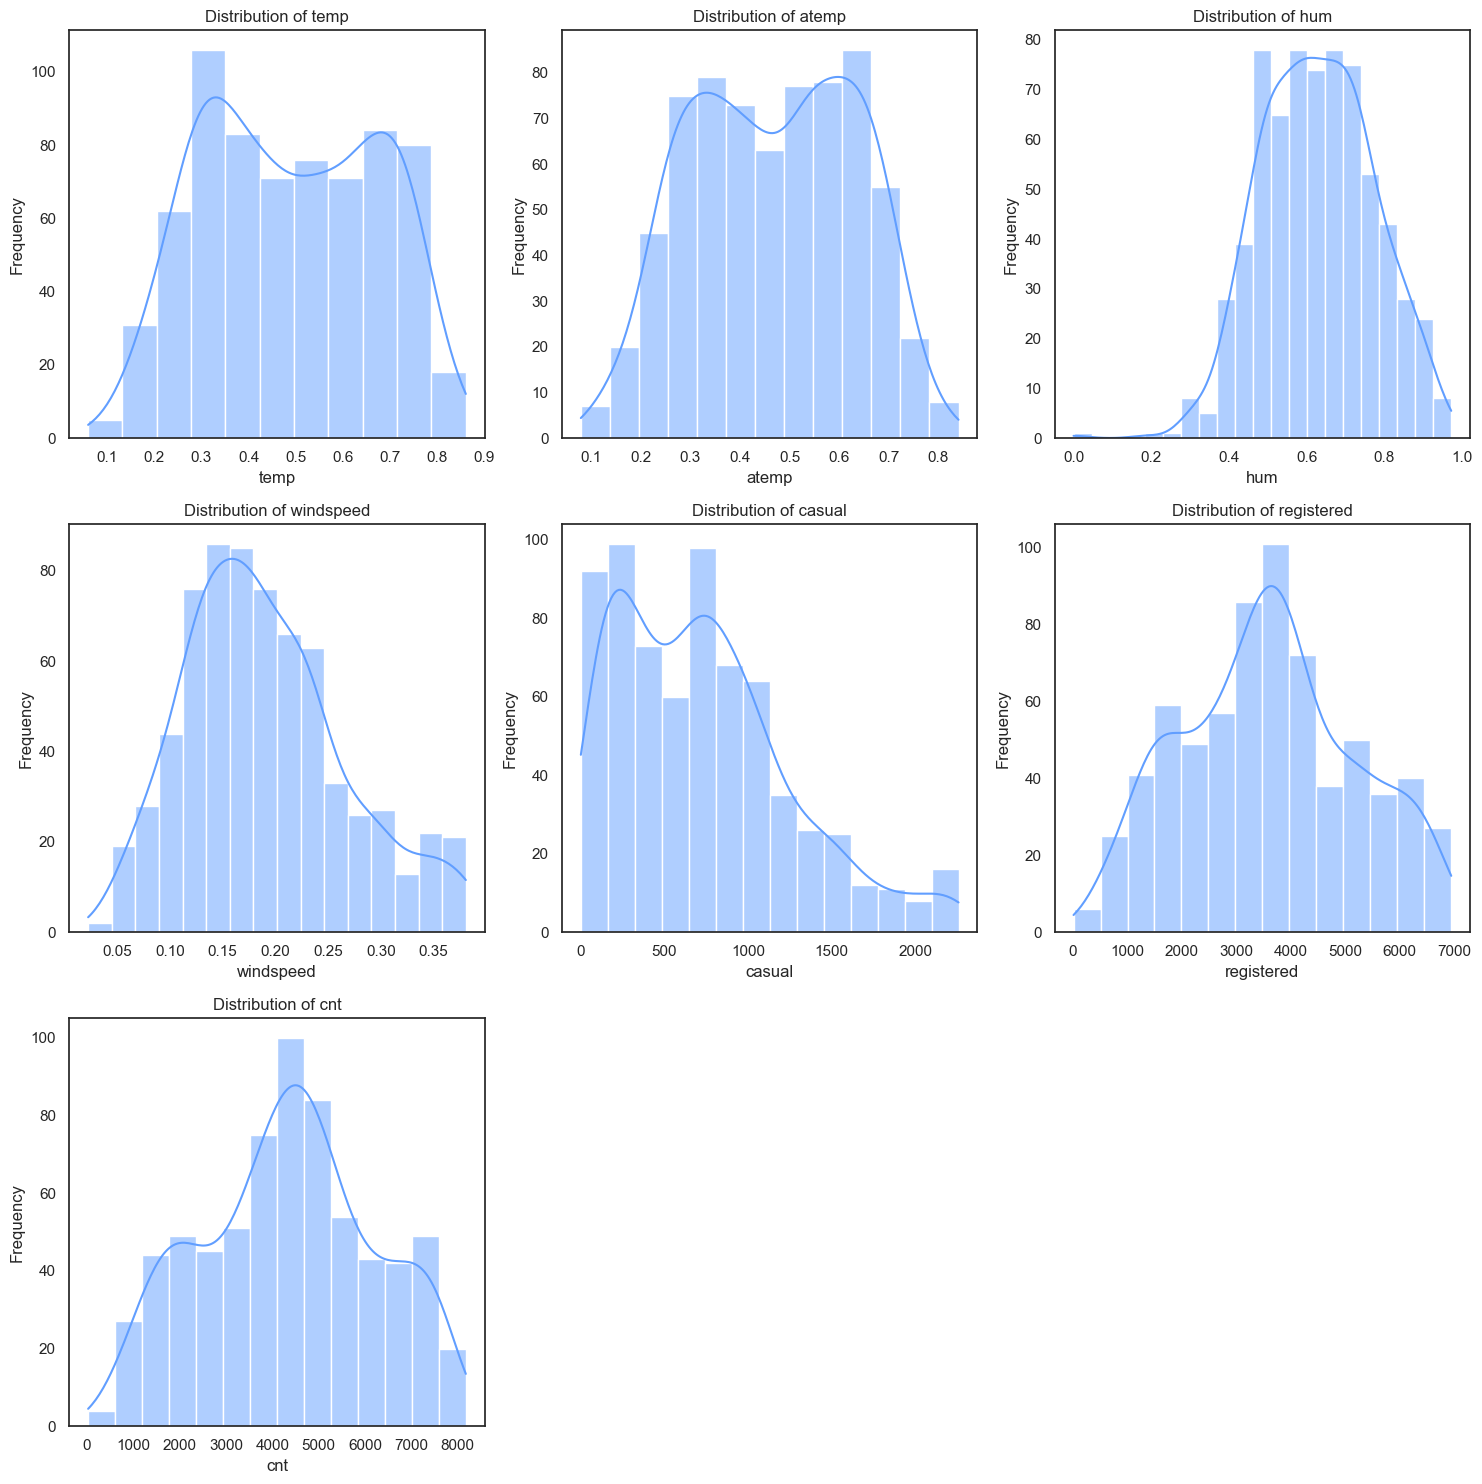

In [50]:
plot_numerical_distribution(day_df, numerical_columns, grid_size=(3, 3), color="#619eff")

Untuk distribusi pada fitur numerik, terlihat bahwa:

**Fitur Cuaca (temp, atemp, hum, windspeed)**
- Distribusinya cenderung normal, menunjukkan bahwa puncak distribusi berada di tengah dan meruncing di kedua sisi. Ini menandakan bahwa nilai untuk fitur cuaca berkumpul di sekitar nilai rata-rata.
- **windspeed** sedikit condong ke kanan, yang berarti lebih banyak data memiliki nilai kecepatan angin yang lebih rendah dibandingkan dengan nilai yang lebih tinggi.

**Fitur Jumlah Pengguna (casual, registered, cnt)**
- Distribusi cenderung miring ke kanan (skewed to the right), yang berarti sebagian besar data memiliki nilai yang relatif rendah. Ini menunjukkan bahwa sebagian besar hari jumlah pengguna cenderung rendah hingga sedang, dengan beberapa hari yang memiliki jumlah pengguna yang sangat tinggi.


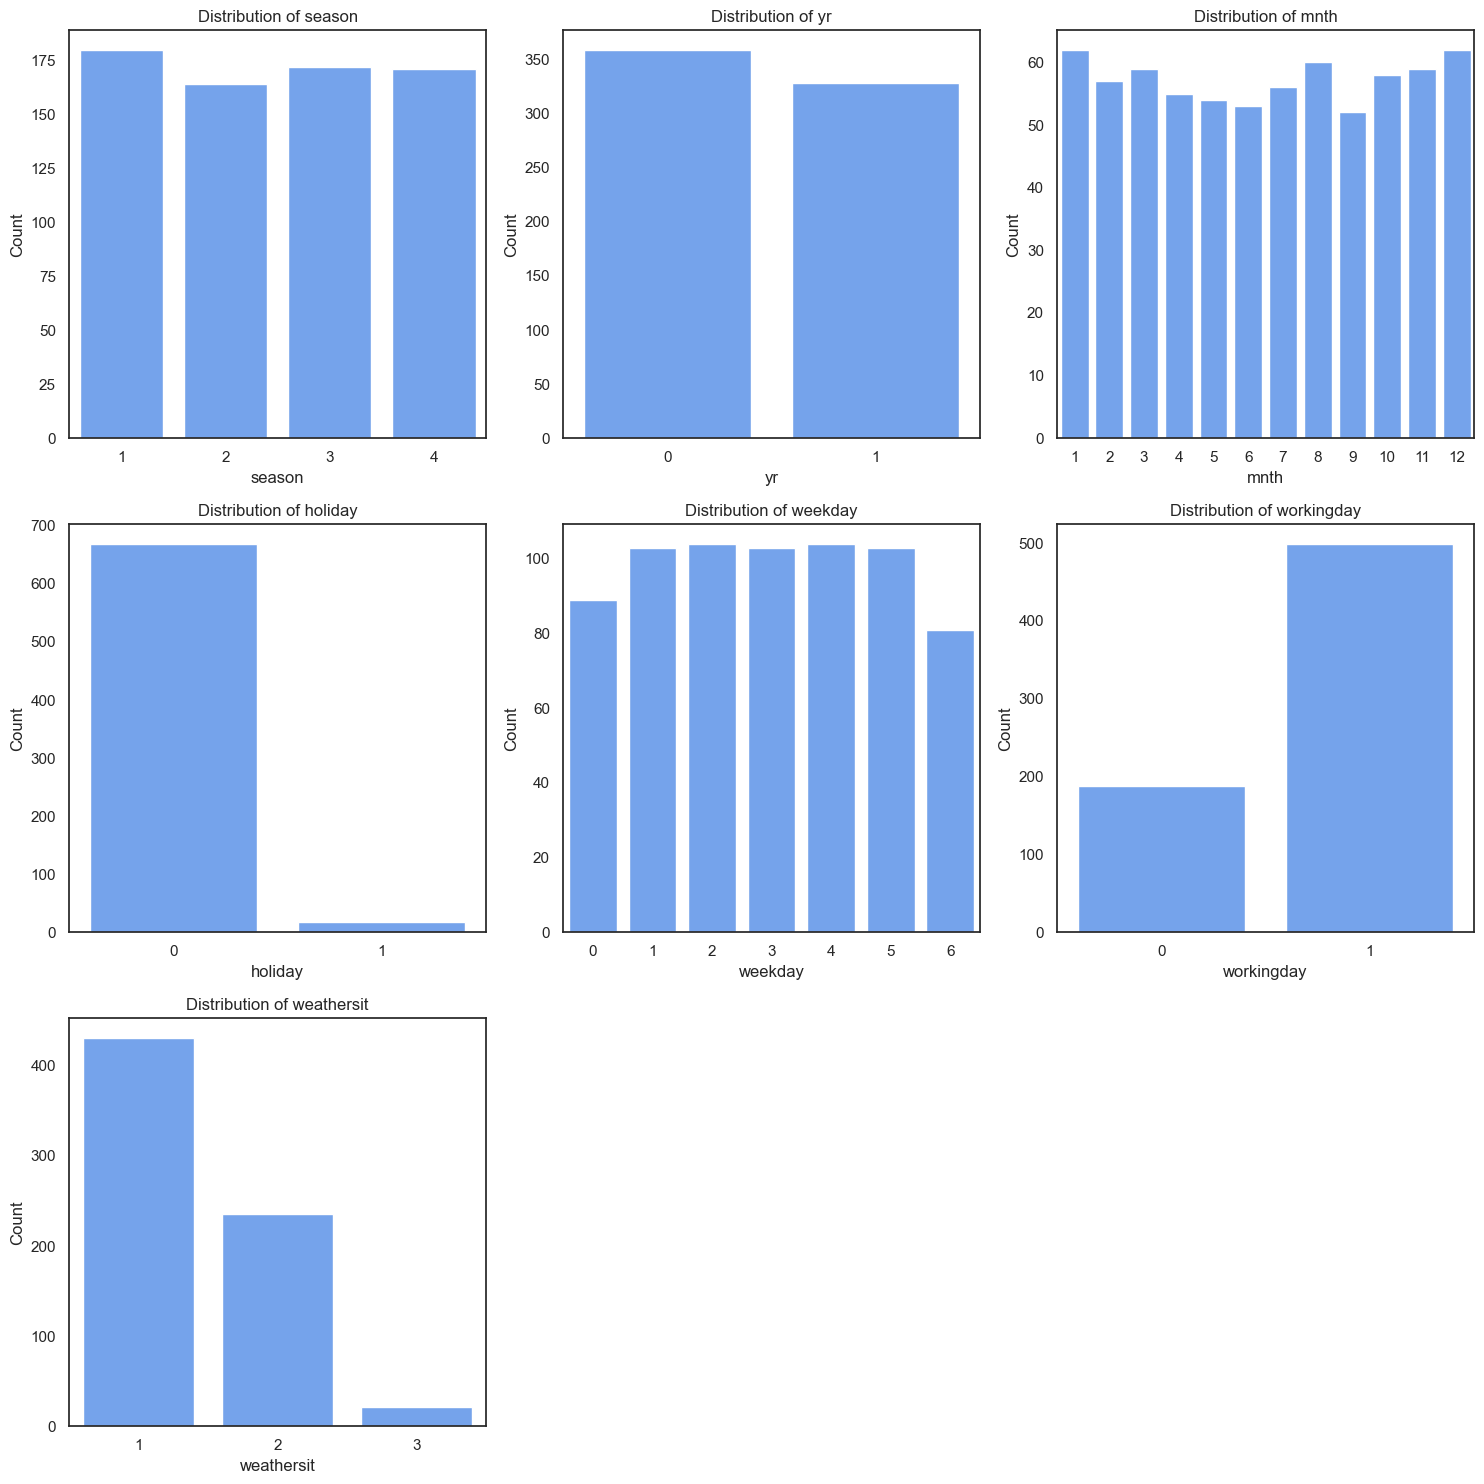

In [51]:
plot_categorical_distribution(day_df, categorical_columns, grid_size=(3, 3), color="#619eff")

Untuk distribusi pada fitur kategorikal, terlihat bahwa:

- Sebagian besar fitur kategorikal menunjukkan distribusi yang relatif merata di antara kategori-kategori lainnya. Ini mengindikasikan bahwa data cukup seimbang.
  
- Tetapi terdapat ketidakseimbangan pada fitur **holiday**, **workingday**, dan **weathersit**. Ketidakseimbangan ini cukup signifikan, di mana sebagian besar data terkonsentrasi pada satu atau dua kategori.

#### **Konversi Fitur Kategorikal dari Numeric ke Deskriptif**

In [52]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mnth_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
weathersit_map = {1: 'Clear', 2: 'Cloudy', 3: 'Rain/Snow'}
holiday_map = {0: 'No', 1: 'Yes'}
workingday_map = {0: 'No', 1: 'Yes'}
yr_map = {0: 2011, 1: 2012}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

#### **Statistik Statistik Penyewaan Sepeda Berdasarkan Bulan pada Tahun 2011 dan 2012 (Pertanyaan 1)**

In [53]:
monthly_stats = day_df.groupby(['yr', 'mnth'])['cnt'].agg(['count', 'min', 'max', 'mean']).reset_index()

monthly_stats['yr'] = monthly_stats['yr'].map(yr_map)
monthly_stats['mnth'] = monthly_stats['mnth'].map(mnth_map)

print("Statistik Penyewaan Sepeda Berdasarkan Bulan pada Tahun 2011 dan 2012:")
print(monthly_stats)

Statistik Penyewaan Sepeda Berdasarkan Bulan pada Tahun 2011 dan 2012:
      yr       mnth  count   min   max         mean
0   2011    January     31   431  1985  1231.903226
1   2011   February     28  1005  2927  1721.964286
2   2011      March     31   605  3239  2065.967742
3   2011      April     30   795  5312  3162.333333
4   2011        May     30  2633  5805  4367.766667
5   2011       June     30  3767  5515  4783.733333
6   2011       July     28  3285  5538  4454.500000
7   2011     August     31  1115  5895  4409.387097
8   2011  September     29  1842  5423  4223.379310
9   2011    October     30   627  5409  3933.333333
10  2011   November     30  1495  4486  3405.566667
11  2011   December     31   705  3940  2816.870968
12  2012    January     31  1301  4521  3120.774194
13  2012   February     29  1529  5062  3556.448276
14  2012      March     28  3194  6871  5087.214286
15  2012      April     25  1027  7290  5604.400000
16  2012        May     24  2843  7639  6123.

Berdasarkan statistik penyewaan sepedah berdasarkan bulan pada tahun 2011 dan 2012 didapatkan insight sebagai berikut :

- Secara umum, jumlah penyewaan sepedah cenderung meningkat dari tahun 2011 ke 2012. Ini mengindikasikan popularitas yang semakin meningkat dari penggunaan sepeda sebagai alat transportasi.
  
- Terdapat pola musiman yang jelas pada jumlah penyewaan sepedah. Jumlah penyewaan cenderung lebih tinggi pada bulan-bulan hangat (spring, summer) dan lebih rendah pada bulan dingin (fall, winter)

#### **Statistik Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Pertanyaan 2)**

In [54]:
weather_stats = day_df.groupby('weathersit')['cnt'].agg(['count', 'min', 'max', 'mean']).reset_index()
weather_stats['weathersit'] = weather_stats['weathersit'].map(weathersit_map)

print("\nStatistik Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(weather_stats)


Statistik Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
  weathersit  count  min   max         mean
0      Clear    431  431  8173  4704.431555
1     Cloudy    235  605  7582  3900.544681
2  Rain/Snow     21   22  4639  1803.285714


Berdasarkan statistik penyewaan sepeda berdasarkan kondisi cuaca didapatkan insight sebagai berikut :

- Cuaca cerah (clear) lebih dominan karena sebagian besar data dikumpulkan pada hari cerah. Ini menunjukkan bahwa kondisi cuaca cerah mempengaruhi penyewaan sepedah.
  
- Cuaca berpengaruh signifikan karena rata-rata jumlah penyewaan sepedah pada hari cerah (clear) jauh lebih tinggi dibandingkan dengan hari berawan (cloudy) atau hujan/salju (rain/snow). Ini menunjukkan bahwa cuaca merupakan faktor penting dalam menentukan jumlah orang yang ingin menyewa sepedah.

#### **Statistik Penyewaan Sepedah Berdasarkan Hari Libur dan Hari Kerja (Pertanyaan 3)**

In [55]:
holiday_stats = day_df.groupby('holiday')['cnt'].agg(['count', 'min', 'max', 'mean']).reset_index()
holiday_stats['holiday'] = holiday_stats['holiday'].map(holiday_map)

workingday_stats = day_df.groupby('workingday')['cnt'].agg(['count', 'min', 'max', 'mean']).reset_index()
workingday_stats['workingday'] = workingday_stats['workingday'].map(workingday_map)

print("\nStatistik Penyewaan Sepeda Berdasarkan Hari Libur:")
print(holiday_stats)
print("\nStatistik Penyewaan Sepeda Berdasarkan Hari Kerja:")
print(workingday_stats)


Statistik Penyewaan Sepeda Berdasarkan Hari Libur:
  holiday  count   min   max         mean
0      No    669    22  8173  4369.448430
1     Yes     18  1000  6370  3274.777778

Statistik Penyewaan Sepeda Berdasarkan Hari Kerja:
  workingday  count  min   max         mean
0         No    188  605  7333  3713.079787
1        Yes    499   22  8173  4577.250501


Berdasarkan statistik penyewaan sepedah berdasarkan hari libur dan hari kerja didapatkan insight sebagai berikut :

- Jumlah penyewaan lebih tinggi pada hari kerja, ini menunjukkan bahwa orang cenderung lebih banyak menyewa sepedah pada hari kerja.

- Walaupun rata-rata lebih rendah, hari libur memiliki variasi yang lebih tinggi dengan nilai minimum dan maksimum yang cukup jauh. Ini mengindikasikan bahwa ada beberapa hari libur yang sangat ramai menggunakan sepedah.

## **Visualization & Explanatory Analysis**

### Pertanyaan 1:  Bagaimana pola penyewaan sepeda berdasarkan bulan pada tahun 2011 dan 2012? 

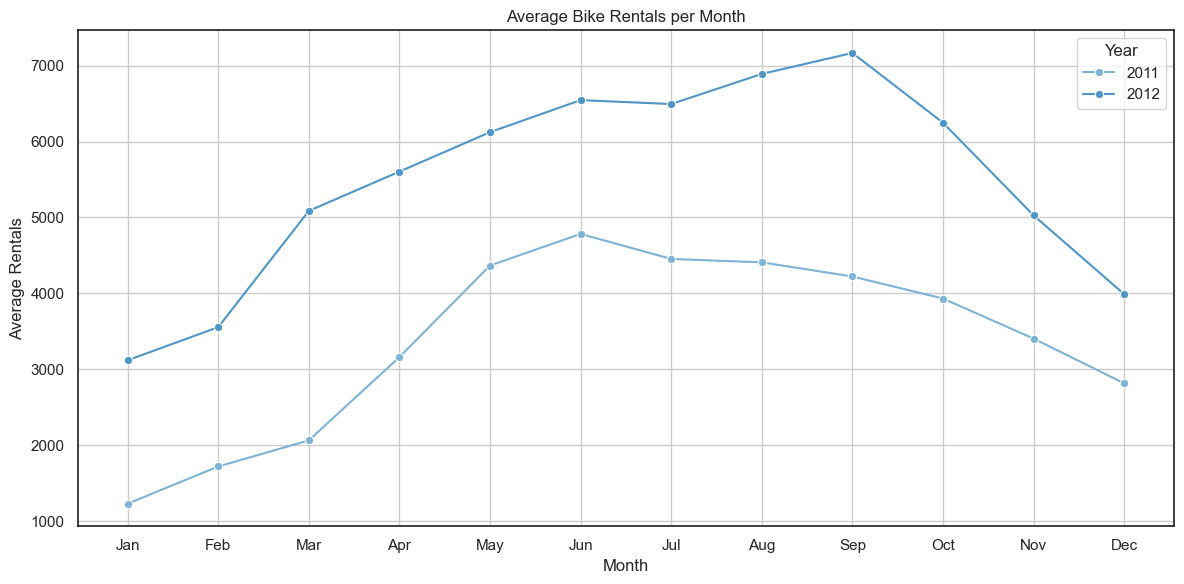

In [56]:
sns.set_theme(style="white")
palette = sns.color_palette("Blues_d", n_colors=4)

monthly_avg = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=monthly_avg, x='mnth', y='cnt', hue='yr', marker='o', palette=palette)
plt.title('Average Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['2011', '2012']
plt.legend(handles=handles, labels=new_labels, title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dikatakan bahwa:

- Secara keseluruhan, jumlah penyewaan sepeda mengalami peningkatan dari tahun 2011 ke 2012. Ini menunjukkan adanya peningkatan minat terhadap penggunaan sepeda sebagai alat transportasi.
  
- Terdapat pola musiman yang jelas, di mana jumlah penyewaan sepeda cenderung lebih tinggi pada bulan-bulan hangat (spring dan summer) dari Maret hingga Agustus, dan lebih rendah pada bulan-bulan dingin (fall dan winter) dari September hingga Februari. Ini menunjukkan bahwa cuaca berpengaruh signifikan terhadap minat seseorang dalam menyewa sepeda.

- Titik terendah penyewaan sepeda pada tahun 2011 dan 2012 terjadi pada bulan Januari, yang masih berada dalam musim dingin (winter). Sebaliknya, titik tertinggi pada tahun 2011 terjadi pada bulan Juni (summer) dan pada tahun 2012 terjadi pada bulan September (awal memasuki musim gugur atau fall). Dengan demikian, pola musiman yang disebutkan pada poin sebelumnya dapat dianggap benar.

### Pertanyaan 2: Apa efek dari berbagai kondisi cuaca terhadap jumlah penyewaan sepeda?

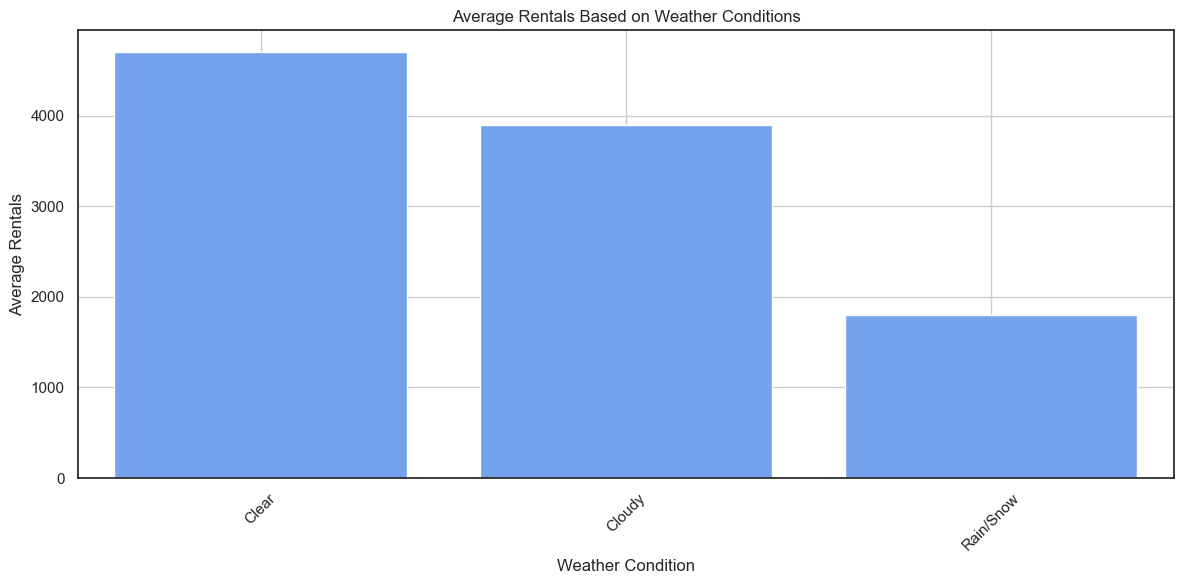

In [57]:
weathersit_map = {1: 'Clear', 2: 'Cloudy', 3: 'Rain/Snow',}

weather_stats = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_stats['weathersit'] = weather_stats['weathersit'].map(weathersit_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=weather_stats, x='weathersit', y='cnt', color='#619eff')
plt.title('Average Rentals Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dikatakan bahwa:

- Cuaca cerah (Clear) sangat berpengaruh pada jumlah penyewaan sepeda karena rata-rata penyewaan pada hari-hari cerah jauh lebih tinggi dibandingkan dengan kondisi cuaca lainnya. Ini menunjukkan bahwa orang-orang lebih cenderung menyewa sepeda saat cuaca cerah.

- Cuaca berawan (Cloudy) memiliki dampak yang lebih kecil terhadap jumlah penyewaan sepeda. Meskipun penyewaan sepeda tetap terjadi pada hari berawan, jumlahnya lebih sedikit dibandingkan dengan hari cerah. Ini mengindikasikan bahwa meskipun tidak seideal cuaca cerah, kondisi berawan masih cukup mendukung aktivitas bersepeda.

- Cuaca hujan/salju (Rain/Snow) sangat mempengaruhi jumlah penyewaan sepeda, dengan jumlah penyewaan yang jauh lebih rendah dibandingkan dengan cuaca cerah dan berawan. Ini menunjukkan bahwa orang-orang cenderung menghindari bersepeda pada kondisi cuaca yang buruk.

### Pertanyaan 3: Apakah hari libur dan hari kerja mempengaruhi penyewaan sepeda?

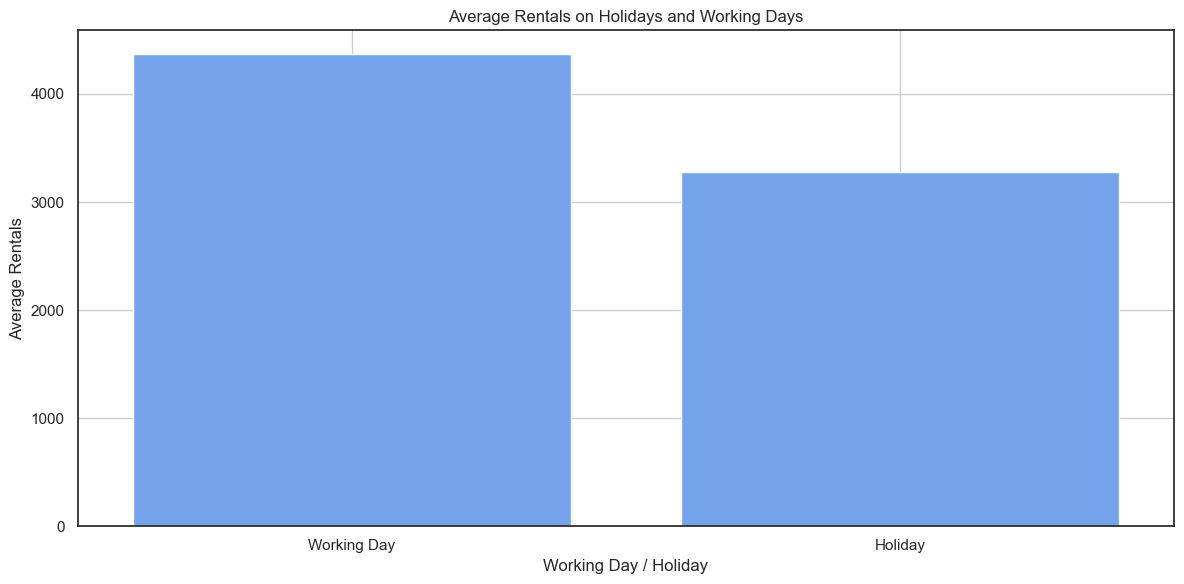

In [58]:
holiday_map = {0: 'Working Day', 1: 'Holiday'}
holiday_stats = day_df.groupby('holiday')['cnt'].mean().reset_index()
holiday_stats['holiday'] = holiday_stats['holiday'].map(holiday_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_stats, x='holiday', y='cnt', color="#619eff")
plt.title('Average Rentals on Holidays and Working Days')
plt.xlabel('Working Day / Holiday')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dikatakan bahwa:

- Hari kerja lebih dominan karena rata-rata jumlah penyewaan sepedah pada hari kerja jauh lebih tinggi dibandingkan dengan hari libur. Ini mengindikasikan bahwa orang-orang lebih cenderung menyewa sepedah saat hari kerja.

- Perbedaan antara rata-rata penyewaan pada hari kerja dan hari libur cukup signifikan. Ini menunjukkan bahwa hari kerja memiliki pengaruh yang lebih besar terhadap jumlah penyewaan sepedah dibandingkan hari libur.

## **Conclusion**

- **Kesimpulan Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan bulan pada tahun 2011 dan 2012?**  
  
  - Jumlah penyewaan sepeda meningkat dari 2011 ke 2012 dengan pola yang jelas, lebih tinggi pada bulan hangat (Maret hingga Agustus) dan lebih rendah pada bulan dingin (September hingga Februari). Titik terendah terjadi pada Januari dan tertinggi pada Juni 2011 serta September 2012, ini menunjukkan berpengaruh terhadap minat penyewaan sepeda.

- **Kesimpulan Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?**  
  
  - Kondisi cuaca memiliki pengaruh signifikan terhadap penyewaan sepeda. Cuaca cerah meningkatkan jumlah penyewaan secara drastis, sedangkan cuaca berawan juga mendukung tetapi tidak sebesar cuaca cerah. Sebaliknya, cuaca hujan atau salju menyebabkan penurunan jumlah penyewaan yang signifikan, karena orang cenderung menghindari bersepeda dalam kondisi cuaca buruk.

- **Apakah hari libur dan hari kerja mempengaruhi penyewaan sepeda?**

  - Hari kerja mempengaruhi penyewaan sepeda secara signifikan dibandingkan hari libur, dengan rata-rata penyewaan yang jauh lebih tinggi pada hari kerja. Perbedaan yang signifikan antara hari kerja dan hari libur menunjukkan bahwa orang lebih cenderung menyewa sepeda pada hari kerja.

## **Analisis Lanjutan (Clustering)**

#### **Clustering**

**Kategori Penyewaan Sepeda Berdasarkan Jumlah Total Penyewaan**

Untuk menganalisis data penyewaan sepeda, pengelompokan dilakukan berdasarkan jumlah total penyewaan ke dalam kategori dengan rentang nilai sebagai berikut:

- **Low**: Jumlah total penyewaan sepeda kurang dari 2000.
- **Medium**: Jumlah total penyewaan sepeda antara 2000 hingga kurang dari 4000.
- **High**: Jumlah total penyewaan sepeda 4000 atau lebih.



Statistik Penyewaan Sepeda Berdasarkan Kategori:
  rental_category  count   min   max         mean
0            High    408  4010  8173  5595.262255
1          Medium    181  2028  3982  3108.022099
2             Low     98    22  1996  1394.775510


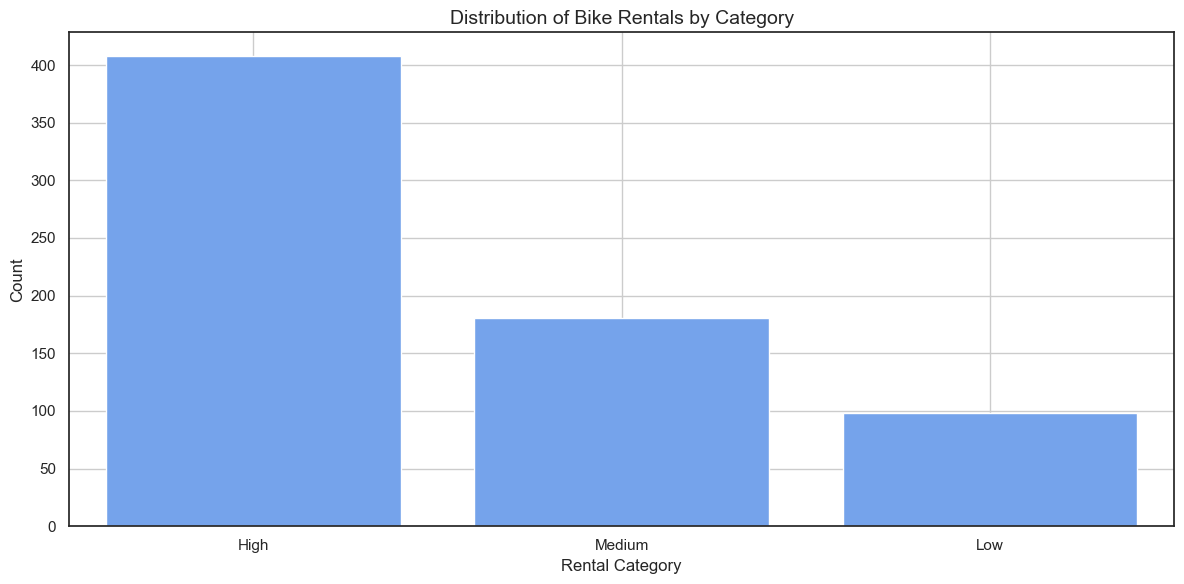

In [59]:
def categorize_rentals(cnt):
    if cnt < 2000:
        return 'Low'
    elif 2000 <= cnt < 4000:
        return 'Medium'
    else:
        return 'High'

day_df['rental_category'] = day_df['cnt'].apply(categorize_rentals)

category_order = ['High', 'Medium', 'Low']
day_df['rental_category'] = pd.Categorical(day_df['rental_category'], categories=category_order, ordered=True)

category_stats = day_df.groupby('rental_category')['cnt'].agg(['count', 'min', 'max', 'mean']).reset_index()
print("\nStatistik Penyewaan Sepeda Berdasarkan Kategori:")
print(category_stats)

plt.figure(figsize=(12, 6))
sns.countplot(x='rental_category', data=day_df, color="#619eff")
plt.title('Distribution of Bike Rentals by Category', fontsize=14)
plt.xlabel('Rental Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Setelah dilakukan pengelompokan didapat insight sebagai berikut :

- Kategori **High** menunjukkan dominasi yang jelas baik secara visual maupun numerik, dengan jumlah penyewaan sebanyak 408 dan rata-rata 5595. Ini mengindikasikan bahwa sebagian besar penyewaan sepeda masuk ke dalam kategori **High**.

- **Variasi dalam Kategori High**: Meskipun dominan, kategori **High** memiliki rentang nilai penyewaan yang luas, dari 4010 hingga 8173, yang menunjukkan adanya variasi dalam preferensi pelanggan.

- **Kategori Medium**: Dalam visualisasi, kategori **Medium** berada di antara kategori **High** dan **Low** dalam hal jumlah penyewaan. Secara numerik, kategori **Medium** memiliki jumlah penyewaan sebanyak 181 dengan rata-rata 3108, menandakan permintaan yang cukup signifikan pada kategori ini.

- **Kategori Low**: Kategori **Low** adalah yang paling sedikit dalam hal jumlah penyewaan, dengan total 98 penyewaan dan rata-rata 1398. Ini menunjukkan bahwa aktivitas penyewaan pada kategori **Low** relatif jarang terjadi.

In [60]:
day_df.to_csv("data_final.csv", index=False)

Mengubah dataframe akhir yang digunakan untuk analisis menjadi csv